## Gather

In [513]:
import csv, pandas as pd, numpy as np
import matplotlib.pyplot as plt, requests
import tweepy, time, json 
from timeit import default_timer as timer
%matplotlib inline

### loading the WeRateDogs twitter archive
 

In [599]:
# loading the WeRateDogs twitter archive
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### requesting the tweet image predictions file 
 

In [600]:
# i read the file as csv to read it with the dataframe
import io
import pandas as pd


response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
tweet_img_predication_df = pd.read_csv(io.StringIO(response.text), sep='\t')   
tweet_img_predication_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [601]:
tweet_img_predication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API to retreive the retweet counts and the favorites count 


In [5]:
# list of tweet ids to iterate over the tweepy tweets request
tweet_ids = twitter_archive_df.tweet_id.values
print(len(tweet_ids))

2356


In [6]:
# use twitter API to retreive the retweet counts and the favorites count 
# using tweepy and the acquired consumer_key, consumer_secret and tokens

# acquire the authorization from tweepy api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
count = 0
failed_items = {}
start = timer()

with open('tweet_json.txt', 'w') as tweet_file:
    # save each tweet id result in a file
    for tweet_id in tweet_ids:
        count += 1
        print(str(count)+ ": "+ str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, tweet_file)
            tweet_file.write('\n')
        except tweepy.TweepError as te:
            print("fail")
            failed_items[tweet_id] = te
            pass
end = timer()
print(end - start)
print(failed_items)


1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
fail
384: 827199976799354881
385: 826958653328592898
386: 826848

686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 78259864013

Rate limit reached. Sleeping for: 407


902: 758474966123810816
903: 758467244762497024
904: 758405701903519748
905: 758355060040593408
906: 758099635764359168
907: 758041019896193024
908: 757741869644341248
909: 757729163776290825
910: 757725642876129280
911: 757611664640446465
912: 757597904299253760
913: 757596066325864448
914: 757400162377592832
915: 757393109802180609
916: 757354760399941633
917: 756998049151549440
918: 756939218950160384
919: 756651752796094464
920: 756526248105566208
921: 756303284449767430
922: 756288534030475264
923: 756275833623502848
924: 755955933503782912
925: 755206590534418437
926: 755110668769038337
927: 754874841593970688
928: 754856583969079297
929: 754747087846248448
930: 754482103782404096
931: 754449512966619136
932: 754120377874386944
933: 754011816964026368
fail
934: 753655901052166144
935: 753420520834629632
936: 753398408988139520
937: 753375668877008896
938: 753298634498793472
939: 753294487569522689
940: 753039830821511168
941: 753026973505581056
942: 752932432744185856
943: 752917

1234: 712809025985978368
1235: 712717840512598017
1236: 712668654853337088
1237: 712438159032893441
1238: 712309440758808576
1239: 712097430750289920
1240: 712092745624633345
1241: 712085617388212225
1242: 712065007010385924
1243: 711998809858043904
1244: 711968124745228288
1245: 711743778164514816
1246: 711732680602345472
1247: 711694788429553666
1248: 711652651650457602
1249: 711363825979756544
1250: 711306686208872448
1251: 711008018775851008
1252: 710997087345876993
1253: 710844581445812225
1254: 710833117892898816
1255: 710658690886586372
1256: 710609963652087808
1257: 710588934686908417
1258: 710296729921429505
1259: 710283270106132480
1260: 710272297844797440
1261: 710269109699739648
1262: 710153181850935296
1263: 710140971284037632
1264: 710117014656950272
1265: 709918798883774466
1266: 709901256215666688
1267: 709852847387627521
1268: 709566166965075968
1269: 709556954897764353
1270: 709519240576036864
1271: 709449600415961088
1272: 709409458133323776
1273: 709225125749587968


1562: 688385280030670848
1563: 688211956440801280
1564: 688179443353796608
1565: 688116655151435777
1566: 688064179421470721
1567: 687841446767013888
1568: 687826841265172480
1569: 687818504314159109
1570: 687807801670897665
1571: 687732144991551489
1572: 687704180304273409
1573: 687664829264453632
1574: 687494652870668288
1575: 687480748861947905
1576: 687476254459715584
1577: 687460506001633280
1578: 687399393394311168
1579: 687317306314240000
1580: 687312378585812992
1581: 687127927494963200
1582: 687124485711986689
1583: 687109925361856513
1584: 687102708889812993
1585: 687096057537363968
1586: 686947101016735744
1587: 686760001961103360
1588: 686749460672679938
1589: 686730991906516992
1590: 686683045143953408
1591: 686618349602762752
1592: 686606069955735556
1593: 686394059078897668
1594: 686386521809772549
1595: 686377065986265092
1596: 686358356425093120
1597: 686286779679375361
1598: 686050296934563840
1599: 686035780142297088
1600: 686034024800862208
1601: 686007916130873345


Rate limit reached. Sleeping for: 413


1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848
1814: 676776431406465024
1815: 676617503762681856
1816: 676613908052996102
1817: 676606785097199616
1818: 676603393314578432
1819: 676593408224403456
1820: 676590572941893632
1821: 676588346097852417
1822: 676582956622721024
1823: 676575501977128964
1824: 676533798876651520
1825: 676496375194980353
1826: 676470639084101634
1827: 676440007570247681
1828: 676430933382295552
1829: 676263575653122048
1830: 676237365392908289
1831: 676219687039057920
1832: 676215927814406144
1833: 676191832485810177
1834: 676146341966438401
1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737
1840: 675891555769696257
1841: 675888385639251968


2130: 670290420111441920
2131: 670093938074779648
2132: 670086499208155136
2133: 670079681849372674
2134: 670073503555706880
2135: 670069087419133954
2136: 670061506722140161
2137: 670055038660800512
2138: 670046952931721218
2139: 670040295598354432
2140: 670037189829525505
2141: 670003130994700288
2142: 669993076832759809
2143: 669972011175813120
2144: 669970042633789440
2145: 669942763794931712
2146: 669926384437997569
2147: 669923323644657664
2148: 669753178989142016
2149: 669749430875258880
2150: 669684865554620416
2151: 669683899023405056
2152: 669682095984410625
2153: 669680153564442624
2154: 669661792646373376
2155: 669625907762618368
2156: 669603084620980224
2157: 669597912108789760
2158: 669583744538451968
2159: 669573570759163904
2160: 669571471778410496
2161: 669567591774625800
2162: 669564461267722241
2163: 669393256313184256
2164: 669375718304980992
2165: 669371483794317312
2166: 669367896104181761
2167: 669363888236994561
2168: 669359674819481600
2169: 669354382627049472


In [602]:
# read the saved file as json into a dataframe
data = []
with open('tweet_json.txt', 'r') as tweet_file:
    data = tweet_file.read()
tweets_status_df = pd.read_json(data, lines = True)    
tweets_status_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'urls': [], 'symbols': [], 'user_mentions': [], 'hashtags': [], 'media': [{'id': 892420639486877696, 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'id_str': '892420639486877696', 'url': 'https://t.co/MgUWQ76dJU', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'sizes': {'small': {'h': 528, 'resize': 'fit', 'w': 540}, 'large': {'h': 528, 'resize': 'fit', 'w': 540}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'medium': {'h': 528, 'resize': 'fit', 'w': 540}}, 'type': 'photo', 'indices': [86, 109], 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1'}]}","{'media': [{'id': 892420639486877696, 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'id_str': '892420639486877696', 'url': 'https://t.co/MgUWQ76dJU', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'sizes': {'small': {'h': 528, 'resize': 'fit', 'w': 540}, 'large': {'h': 528, 'resize': 'fit', 'w': 540}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'medium': {'h': 528, 'resize': 'fit', 'w': 540}}, 'type': 'photo', 'indices': [86, 109], 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1'}]}",38140,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,8344,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'statuses_count': 9394, 'default_profile': False, 'url': 'https://t.co/N7sNNHAEXS', 'protected': False, 'contributors_enabled': False, 'verified': True, 'listed_count': 5608, 'following': False, 'profile_link_color': 'F5ABB5', 'has_extended_profile': False, 'id': 4196983835, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760', 'translator_type': 'none', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'indices': [0, 23], 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com'}]}, 'description': {'urls': []}}, 'id_str': '4196983835', 'time_zone': None, 'profile_sidebar_border_color': '000000', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com', 'notifications': False, 'is_translation_enabled': False, 'profile_background_tile': False, 'geo_enabled': True, 'follow_request_sent': False, 'location': 'merch ⇨', 'is_translator': False, 'profile_use_background_image': False, 'profile_background_color': '000000', 'favourites_count': 140503, 'utc_offset': None, 'name': 'WeRateDogs™', 'friends_count': 12, 'screen_name': 'dog_rates', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg', 'profile_text_color': '000000', 'followers_count': 7512223, 'profile_sidebar_fill_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'lang': 'en', 'default_profile_image': False, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'urls': [], 'symbols': [], 'user_mentions': [], 'hashtags': [], 'media': [{'id': 892177413194625024, 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'id_str': '892177413194625024', 'url': 'https://t.co/0Xxu71qeIV', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'sizes': {'small': {'h': 680,

## Assess

### Data extracted from Twitter API Assessment

In [9]:
tweets_status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

I need to remove tweets that are retweets to reply to users since we are not interested in investigating these tweets.
so i need to look into columns in_reply_to_status_id and quoted_status and retweeted_status.
- Quote Tweets are much like Retweets except that they include a new Tweet message

lets look for duplicate id values in this dataframe

In [10]:
tweets_status_df[tweets_status_df.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


checking for duplicates or any other missing values does not show any issues for this dataframe so far

### twitter archieve enhanced dataframe

In [35]:
# to see the columns full text 
pd.set_option('display.max_colwidth', -1)

In [53]:
# information about what is in the dataframe
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- the first issue that seem to be present is that i have different missing tweets with the previous dataframe which is expected since some tweets are no longer available.
- also i need to remove empty columns like in_reply_to_status_id, retweeted_status_id
- timestamp type is string which needs to be converted to date instead
- dog stages needs to be one column and the type needs to be categorical
so now i will check the values in the dataframe.

In [40]:
# look for rating and dog type inconsistency 
twitter_archive_df[['text','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo','name']]

,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,None,None,None,None,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,None,None,None,None,Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,None,None,None,None,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,None,None,None,None,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,None,None,None,None,Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,None,None,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,None,None,None,None,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,None,None,None,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,None,None,None,None,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,doggo,None,None,None,Cassie


- it seems we have invalid dog names such as a, an, the, actually.
- other issues include the dog stages needs to be under one variables instead of several and it needs to be category
- source column is difficult to read.
- some tweets don't have any dog stage 
- missing names which can be due to not using named and name is to derive the words
- some of the text column values contain \n and other escape characters 
- dog stage and dog name missing values have values of None instead of Nan

In [14]:
# groupbed by dog names
twitter_archive_df.groupby('name')['name'].count()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [47]:
# looking into rows with 'name' column is lowercase and the words 'name is' or 'named' is part of the text
twitter_archive_df.loc[(twitter_archive_df['name'].str.islower()) & (twitter_archive_df['text'].str.contains('name is') | twitter_archive_df['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https

In [49]:
# looking into rows with 'name' column is lowercase and the words 'name is' or 'named' is part of the text
twitter_archive_df.loc[(twitter_archive_df['name'].str.islower())][['text','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo','name']]

,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,None,None,None,None,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14,10,None,None,pupper,None,a
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,12,10,None,None,None,None,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12,10,None,None,None,None,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",12,10,None,None,None,None,quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,10,10,None,None,None,None,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14,10,None,None,None,None,one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,11,10,None,None,None,None,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,13,10,None,None,None,None,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,13,10,None,None,pupper,None,mad


In [48]:
# we can see that some of the records that does not have a name it is missing because these terms are not used 
twitter_archive_df.loc[(twitter_archive_df['text'].str.contains('name is') | twitter_archive_df['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,None,None,None,None,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 loo

In [15]:
twitter_archive_df.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

look for duplicated tweet ids

In [16]:
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


looking for any missing dog stages

In [221]:
pupper_none_condition =((twitter_archive_df.pupper=='None') & twitter_archive_df['text'].str.contains('pupper'))
floof_none_condition = ((twitter_archive_df.floofer=='None') & twitter_archive_df['text'].str.contains('floof'))
puppo_none_condition =((twitter_archive_df.puppo=='None') & twitter_archive_df['text'].str.contains('puppo'))
doggo_none_condition = ((twitter_archive_df.doggo=='None') & twitter_archive_df['text'].str.contains('doggo'))
print (len(twitter_archive_df.loc[pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition]))
twitter_archive_df.loc[pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition][['text','pupper','puppo','floofer', 'doggo']]


56


,text,pupper,puppo,floofer,doggo
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None,None,None,None
53,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,None,None,None,None
54,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,None,None,None,None
83,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,None,None,None,None
85,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",None,None,None,None
106,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,None,None,None,None
134,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,None,None,None,None
172,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,None,None,None,doggo
268,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,None,None,None,None
296,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,None,None,None,None


we can see that we have 56 missing dog stages that has some values which is due to either the usage of plural form such as puppers instead of pupper or  floofs instead of floof or doggos instead of doggo. though some values are misspelled like puppoccino and such so this i don't need to fix

### twitter image predication enhanced dataframe

In [50]:
tweet_img_predication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
tweet_img_predication_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


looking for duplicates

In [52]:
tweet_img_predication_df[tweet_img_predication_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Summary

#### Quality
twitter_archive_df:
- Dataset contains retweets resulted in empty columns 
- Erroneous datatypes (dog stage) should be category type instead of a string also timestamp needs to be date instead of a string
- Some Missing fields are listed as a 'None' value instead of Nan.
- Incorrect dog names usually in a lower case
- missing dog stages
- missing values for dog names 
- source in the tweet_archive dataframe is difficult to read since it is inside a tag

twitter_img_predication_df
- p1, p2, p3 columns needs to be category type
- extra tweet ids

tweet_status_df 
- dataset contains retweets 

#### Tidiness
- dog stage columns are in several columns instead of one column
- combine the tweet_status_df with the twitter archive and the image predication dataframe
- multiple variable information contained in the same column like the text column which is contained in the rating, dog stages and name columns 

## Clean

In [603]:
# make a copy of all the dataframes so that we retain the original data and resort to it when need it 
twitter_archive_df_copy = twitter_archive_df.copy() 
tweet_img_predication_df_copy = tweet_img_predication_df.copy()
tweets_status_df_copy = tweets_status_df.copy()

### Quality: `twitter_archive_df`: 

#### Dataset contains retweets resulted in empty columns

##### Define
I need to remove the retweets or rows that is suspected to be retweets or replies from the data. 
so if any of the following columns have values: in_reply_to_user_id, retweeted_status_id and retweeted_user_id
then this means we have replys to tweets or retweets so we need to remove these.

##### Code

In [604]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [605]:
# remove all the non null values for the retweeted_status_id 
#and in_reply_to_status_id
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy['retweeted_status_id'].isnull() & twitter_archive_df_copy['in_reply_to_status_id'].isnull()]

##### Test
check that we don't have any values under the columns that we removed

In [606]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [607]:
# drop the columns that are now not needed for the analysis and assesment 
twitter_archive_df_copy = twitter_archive_df_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id'], axis=1)

In [608]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Tidiness:

#### combine the tweet_status_df with the twitter archive and the image predication dataframe

##### Define
I will use the merge function from pandas to merge the columns based on tweet_ids. merging based on the left column will only leave data that is present in the twitter archive data which eliminite the need to remove the extra or missing tweet ids from the other dataframes

##### Code

In [792]:
twitter_full_enhanced_df = pd.merge(twitter_archive_df_copy, tweet_img_predication_df_copy, on = 'tweet_id', how = 'left')
twitter_full_enhanced_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [793]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

it is noticable that the p1,p2,p3 values are less than tweet_ids due to the extra or missing values from the tweet_img_predications

In [794]:
twitter_full_enhanced_df = pd.merge(twitter_full_enhanced_df, tweets_status_df_copy, left_on=['tweet_id'],right_on=['id'], how = 'left').drop('id', axis=1)
twitter_full_enhanced_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,NaN,NaN,NaN,NaN,8344.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'statuses_count': 9394, 'default_profile': False, 'url': 'https://t.co/N7sNNHAEXS', 'protected': False, 'contributors_enabled': False, 'verified': True, 'listed_count': 5608, 'following': False, 'profile_link_color': 'F5ABB5', 'has_extended_profile': False, 'id': 4196983835, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760', 'translator_type': 'none', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'indices': [0, 23], 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com'}]}, 'description': {'urls': []}}, 'id_str': '4196983835', 'time_zone': None, 'profile_sidebar_border_color': '000000', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com', 'notifications': False, 'is_translation_enabled': False, 'profile_background_tile': False, 'geo_enabled': True, 'follow_request_sent': False, 'location': 'merch ⇨', 'is_translator': False, 'profile_use_background_image': False, 'profile_background_color': '000000', 'favourites_count': 140503, 'utc_offset': None, 'name': 'WeRateDogs™', 'friends_count': 12, 'screen_name': 'dog_rates', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg', 'profile_text_color': '000000', 'followers_count': 7512223, 'profile_sidebar_fill_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'lang': 'en', 'default_profile_image': False, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1072659905235042304/nm3HWlPG_normal.jpg'}"
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,NaN,NaN,NaN,NaN,6167.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'statuses_count': 9394, 'default_profile': False, 'url': 'https://t.co/N7sNNHAEXS', 'protected': False, 'contributors_enabled': False, 'verified': True, 'listed_count': 5608, 'following': False, 'profile_link_color': 'F5ABB5', 'has_extended_profile': False, 'id': 4196983835, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1544368760', 'translator_type': 'none', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'indices': [0, 23], 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com'}]}, 'description': {'urls': []}}, 'id_str': '4196983835', 'time_zone': None, 'profile_sidebar_border_color': '000000', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com', 'notifications': False, 'is_translation_enabled': False, 'profile_background_tile': False, 'geo_enabled': True, 'follow_request_

##### Test

In [795]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 54 columns):
tweet_id                         2097 non-null int64
timestamp                        2097 non-null object
source_x                         2097 non-null object
text                             2097 non-null object
expanded_urls                    2094 non-null object
rating_numerator                 2097 non-null int64
rating_denominator               2097 non-null int64
name                             2097 non-null object
doggo                            2097 non-null object
floofer                          2097 non-null object
pupper                           2097 non-null object
puppo                            2097 non-null object
jpg_url                          1971 non-null object
img_num                          1971 non-null float64
p1                               1971 non-null object
p1_conf                          1971 non-null float64
p1_dog                        

In [796]:
# remove columns that are not off interest in the analysis
twitter_full_enhanced_df = twitter_full_enhanced_df[['tweet_id','timestamp','source_x','text','rating_numerator','rating_denominator','name',
                                                     'doggo', 'floofer','pupper', 'puppo','favorite_count','retweet_count',
                                                     'jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                                                    'p3','p3_conf','p3_dog']]
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source_x              2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2096 non-null float64
retweet_count         2096 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-

we see that the three dataframes are merged into one with the removal of missing or retweeted data

#### Some Missing Values are listed under None instead of Nan value
This was present in the dog names, dog stages

##### Define
replace the None value with Nan is the specified fields

##### Code

In [797]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source_x              2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2096 non-null float64
retweet_count         2096 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-

In [798]:
twitter_full_enhanced_df[['name', 'doggo', 'floofer','pupper', 'puppo']].head()

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None


In [799]:
twitter_full_enhanced_df.loc[(twitter_full_enhanced_df[['name', 'doggo', 'floofer','pupper', 'puppo']]=='None').sum(axis=1)>1]

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,None,None,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,None,None,None,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,None,None,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophi

In [800]:
twitter_full_enhanced_df.replace('None', np.nan, inplace=True)

##### Test

In [801]:
twitter_full_enhanced_df.loc[(twitter_full_enhanced_df[['name', 'doggo', 'floofer','pupper', 'puppo']]=='None').sum(axis=1)>1]

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


we can that we no longer have none values and if we check the info we can know how many elements are nan values and how dog types we have from each group

In [802]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source_x              2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
favorite_count        2096 non-null float64
retweet_count         2096 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null ob

#### Incorrect and missing dog names
which is usually for names that is in lower case some of the examples of these names include: a, an, actaully, such.

##### Define
get the dog names that is a lower case and extract the correct name from the text. 
i noticed that for the text with the name following named or name is: the dog names are not correct so i will use the names that is after these pharses to get the correct names. 
the name will be after the named or name is words in the text field so i will look for both of these pharses and then use the following word as the name


##### Code

In [803]:
len(twitter_full_enhanced_df.loc[(twitter_full_enhanced_df['name'].str.islower()) & (twitter_full_enhanced_df['text'].str.contains('name is') | twitter_full_enhanced_df['text'].str.contains('named'))])

22

We have 22 records that has lower case names and the text contains named or name is.

In [804]:
def find_dog_name(row):
    name_index = -1
    text_list = row['text'].split( )
    if 'name' in text_list:
        name_index = text_list.index('name') + 2
    elif 'named' in text_list:
        name_index = text_list.index('named') + 1
    if (pd.isnull(row['name']) or row['name'].islower()):
        row['name'] = text_list[name_index].replace('.','') if name_index!=-1 else np.nan
    return row

In [805]:
twitter_full_enhanced_df = twitter_full_enhanced_df.apply(find_dog_name, axis=1)

##### Test

In [806]:
len(twitter_full_enhanced_df.loc[(twitter_full_enhanced_df['name'].str.islower()) & (twitter_full_enhanced_df['text'].str.contains('name is') | twitter_full_enhanced_df['text'].str.contains('named'))])

0

In [807]:
twitter_full_enhanced_df.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny        9 
Tucker       9 
Lola         8 
Sadie        8 
Winston      8 
Toby         7 
Daisy        7 
Stanley      6 
Oscar        6 
Jax          6 
Koda         6 
Bailey       6 
Bella        6 
Bo           6 
Zoey         5 
Louis        5 
Bentley      5 
Chester      5 
Buddy        5 
Dave         5 
Rusty        5 
Scout        5 
Leo          5 
Milo         5 
Cassie       4 
Boomer       4 
            .. 
Schnozz      1 
Julio        1 
Mason        1 
Pippin       1 
Roscoe       1 
Charleson    1 
Torque       1 
Shikha       1 
Miley        1 
Arya         1 
Shadoe       1 
Sandra       1 
Mookie       1 
Naphaniel    1 
Alphred      1 
Carbon       1 
Sora         1 
Juckson      1 
Murphy       1 
Rumpole      1 
Lupe         1 
DonDon       1 
Ulysses      1 
Godi         1 
Taco         1 
Fynn         1 
Caryl        1 
Terrenth     1 
Josep        1 
Augie        1 
Name: name, Length: 955,

In [808]:
# tweet that he the issue previously 

twitter_full_enhanced_df[twitter_full_enhanced_df.tweet_id ==668171859951755264][['name','text']]

,name,text
1979,Alfonso,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb


as we can see we used to have 22 records now 0 records are left with the above condition. and names such as a, an, actually and such names are not present anymore 

#### Source  column is difficult to read
The source column in the dataframe is inside a tag and is very difficult to read 

##### Define
Extract the content of each source tag instead of using the full a tag in each row. the name of the source will be between the brackets of the html tags > (end of the starting a tag)and </(start of the ending a tag)

##### Code

In [809]:
twitter_full_enhanced_df.source_x.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source_x, dtype: int64

In [810]:
twitter_full_enhanced_df['source_x'] = twitter_full_enhanced_df.source_x.apply(lambda x: x[x.index('>')+1:x.index('</')])

##### Test

In [811]:
twitter_full_enhanced_df['source_x'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source_x, dtype: int64

we can see now that we have better sources are much more clearer than before with the a tags and it is easier to see that most of the tweets from iphone.

#### Missing values for dog stages for pupper dog stage
make sure we have all the values for the dog stages and none is missing 

##### Define
the main reason for the missing stages is the usage of the  values which is due to the usage of plural form such as puppers instead of pupper or  floofs instead of floof or doggos instead of doggo. so i will create new column for the dog stages and look into the tweet text if it contains any of the dog stage values and define the value accordinlgy. but since some tweets had several types of dog stages so i will first create a list and then i will create seperate row for each dog stage. 

##### Code

In [812]:
pupper_none_condition =((twitter_full_enhanced_df.pupper.isnull()) & twitter_full_enhanced_df['text'].str.contains('pupper'))
floof_none_condition = ((twitter_full_enhanced_df.floofer.isnull()) & twitter_full_enhanced_df['text'].str.contains('floof'))
puppo_none_condition =((twitter_full_enhanced_df.puppo.isnull()) & twitter_full_enhanced_df['text'].str.contains('puppo'))
doggo_none_condition = ((twitter_full_enhanced_df.doggo.isnull()) & twitter_full_enhanced_df['text'].str.contains('doggo'))
print (len(twitter_full_enhanced_df.loc[pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition]))
twitter_full_enhanced_df.loc[pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition][['text','pupper','puppo','floofer', 'doggo']]


56


,text,pupper,puppo,floofer,doggo
24,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,NaN
49,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,NaN,NaN,NaN,NaN
50,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,NaN
73,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,NaN
75,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,NaN
92,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,NaN
114,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,NaN
143,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,doggo
215,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,NaN
234,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,NaN


so we have 56 text that contains one of the pupper,puppo, floofer and doggo. the thing to note is that not all of these will be changed. only the plural form of the dogs will be changed.

In [813]:
import re

def find_dog_stage(row):
    dog_stage_list =  []
    dog_stages_list = ['floof','doggo','pupper','puppo']
    for stage in dog_stages_list:
        text = re.sub(r'[\W]',r' ',row['text']).lower()
        if stage in text:
            text_list = text.split( )
            str_ending = 'er' if stage =='floof' else 's'
            if stage in text_list or stage + str_ending in text_list:
                dog_stage_list.append(stage)
    
    if not dog_stage_list:
        return np.nan
    else:
        return ",".join(dog_stage_list)

In [814]:
test_df_copy = twitter_full_enhanced_df.copy()

In [815]:
test_df_copy['dog_stages'] = test_df_copy.apply(find_dog_stage, axis=1)
test_df_copy.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [816]:
# check the values we have
test_df_copy['dog_stages'].value_counts()

pupper          243
doggo           80 
puppo           22 
floof           17 
doggo,pupper    8  
floof,doggo     1  
doggo,puppo     1  
Name: dog_stages, dtype: int64

In [817]:
def unstack_columns(df,column_name, seperator = ','):
    '''
    this functions unstacks columns with multiple values
    and create new dataframe with these values as rows
    '''
    temp_name = column_name + "_list"
    df.rename(columns = {column_name:temp_name},inplace= True)
    temp_df = df.set_index('tweet_id')[temp_name].str.split(seperator, expand = True).stack().reset_index(1, drop = True).reset_index(name = column_name)
    df_final = pd.merge(df, left_on ='tweet_id', right = temp_df, right_on = 'tweet_id', how='left')
    df_final.drop(temp_name, axis = 1, inplace= True)
    return df_final

In [818]:
test_df_copy = unstack_columns(test_df_copy,'dog_stages')
test_df_copy.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


##### Test

In [819]:
twitter_full_enhanced_df = test_df_copy.copy()
 

In [820]:
# after merge info
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 25 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null object
source_x              2107 non-null object
text                  2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
doggo                 93 non-null object
floofer               11 non-null object
pupper                238 non-null object
puppo                 25 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null object
p2_conf               1980 non-null float64
p2_dog                1980 non-null ob

we can see that dog_stages contain the sum of the dog stages plus 10 extra

In [821]:
pupper_none_condition =((twitter_full_enhanced_df.pupper.isnull()) & twitter_full_enhanced_df['text'].str.contains('pupper'))
floof_none_condition = ((twitter_full_enhanced_df.floofer.isnull()) & twitter_full_enhanced_df['text'].str.contains('floof'))
puppo_none_condition =((twitter_full_enhanced_df.puppo.isnull()) & twitter_full_enhanced_df['text'].str.contains('puppo'))
doggo_none_condition = ((twitter_full_enhanced_df.doggo.isnull()) & twitter_full_enhanced_df['text'].str.contains('doggo'))
dog_stage_not_none =  (twitter_full_enhanced_df.dog_stages.isnull())
print (len(twitter_full_enhanced_df.loc[(pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition) &dog_stage_not_none]))
twitter_full_enhanced_df.loc[(pupper_none_condition | floof_none_condition | puppo_none_condition | doggo_none_condition)& dog_stage_not_none][['text','pupper','puppo','floofer', 'doggo','dog_stages','tweet_id']]

21


,text,pupper,puppo,floofer,doggo,dog_stages,tweet_id
49,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,NaN,NaN,NaN,NaN,NaN,881906580714921986
50,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,NaN,NaN,881666595344535552
75,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,NaN,NaN,876120275196170240
92,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,NaN,NaN,871879754684805121
114,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,NaN,NaN,866686824827068416
236,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,NaN,NaN,837366284874571778
341,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,NaN,NaN,820690176645140481
429,This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,NaN,NaN,805826884734976000
480,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,NaN,NaN,NaN,NaN,NaN,794332329137291264
613,"This is Heinrich (pronounced ""Pat""). He's a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg",NaN,NaN,NaN,NaN,NaN,773922284943896577


In [822]:
# check all the previous if they are present
pupper_on =(twitter_full_enhanced_df.pupper.notnull()) 
floof_on = (twitter_full_enhanced_df.floofer.notnull()) 
puppo_on =(twitter_full_enhanced_df.puppo.notnull()) 
doggo_on = (twitter_full_enhanced_df.doggo.notnull()) 
print (len(twitter_full_enhanced_df.loc[(pupper_on | floof_on | puppo_on | doggo_on )& (dog_stage_not_none)]))
twitter_full_enhanced_df.loc[(pupper_on | floof_on | puppo_on | doggo_on) & (dog_stage_not_none)][['text','pupper','puppo','floofer', 'doggo','dog_stages','tweet_id']]


1


,text,pupper,puppo,floofer,doggo,dog_stages,tweet_id
64,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,NaN,puppo,NaN,NaN,NaN,878776093423087618


we can that the that only one value that was puppo does not have the correct value so i can fix this manually 

In [827]:
twitter_full_enhanced_df.loc[twitter_full_enhanced_df.tweet_id == 878776093423087618, 'dog_stages'] = 'puppo'

In [830]:
# check all the previous if they are present
pupper_on =(twitter_full_enhanced_df.pupper.notnull()) 
floof_on = (twitter_full_enhanced_df.floofer.notnull()) 
puppo_on =(twitter_full_enhanced_df.puppo.notnull()) 
doggo_on = (twitter_full_enhanced_df.doggo.notnull())
dog_stage_none =  (twitter_full_enhanced_df.dog_stages.isnull())
print (len(twitter_full_enhanced_df.loc[(pupper_on | floof_on | puppo_on | doggo_on )& (dog_stage_none)]))
twitter_full_enhanced_df.loc[(pupper_on | floof_on | puppo_on | doggo_on) & (dog_stage_none)][['text','pupper','puppo','floofer', 'doggo','dog_stages','tweet_id']]


0


,text,pupper,puppo,floofer,doggo,dog_stages,tweet_id


In [831]:
twitter_full_enhanced_df.dog_stages.value_counts()

pupper    251
doggo     90 
puppo     24 
floof     18 
Name: dog_stages, dtype: int64

now we can see that we solved the issues with the missing dog stage names by including the plural form of the nouns and we have one column for the dog stages instead of several columns. 

#### Errornous Data Types for columns 

##### Define
change the type of the timestamp column into date and the dog_stage column into category and p1, p2, p3 columns needs to be category type


##### Code

In [832]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 25 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null object
source_x              2107 non-null object
text                  2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
doggo                 93 non-null object
floofer               11 non-null object
pupper                238 non-null object
puppo                 25 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null object
p2_conf               1980 non-null float64
p2_dog                1980 non-null ob

In [833]:
twitter_full_enhanced_df.dog_stages = twitter_full_enhanced_df.dog_stages.astype('category')
twitter_full_enhanced_df.timestamp = pd.to_datetime(twitter_full_enhanced_df.timestamp)

twitter_full_enhanced_df.p1 = twitter_full_enhanced_df.p1.astype('category')
twitter_full_enhanced_df.p2 = twitter_full_enhanced_df.p2.astype('category')
twitter_full_enhanced_df.p3 = twitter_full_enhanced_df.p3.astype('category')

##### Test

In [834]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 25 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null datetime64[ns]
source_x              2107 non-null object
text                  2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
doggo                 93 non-null object
floofer               11 non-null object
pupper                238 non-null object
puppo                 25 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null category
p2_conf               1980 non-null float64
p2_dog                1980

### Tidiness: 

#### - dog stage columns is spread across several columns 
#### - multiple variable information contained in the same column like the text column which is contained in the rating, dog stages and name columns

##### Define
we had 4 columns for each dog stage but by introducing the dog_stage we no longer need these columns nor we have this issue as present so i will drop these columns.
remove text column since it provides redundant information.

##### Code

In [835]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 25 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null datetime64[ns]
source_x              2107 non-null object
text                  2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
doggo                 93 non-null object
floofer               11 non-null object
pupper                238 non-null object
puppo                 25 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null category
p2_conf               1980 non-null float64
p2_dog                1980

In [836]:
# drop the previous column for the multiple columns for dog stages
twitter_full_enhanced_df = twitter_full_enhanced_df.drop(['pupper','puppo','floofer', 'doggo'], axis=1)

##### Test

In [837]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 21 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null datetime64[ns]
source_x              2107 non-null object
text                  2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null category
p2_conf               1980 non-null float64
p2_dog                1980 non-null object
p3                    1980 non-null category
p3_conf               1980 non-null float64
p3_dog                1980 non-null object
dog_stages      

##### Code

In [860]:
twitter_full_enhanced_df = twitter_full_enhanced_df.drop(['text'], axis=1)

##### Test

In [861]:
twitter_full_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 20 columns):
tweet_id              2107 non-null int64
timestamp             2107 non-null datetime64[ns]
source_x              2107 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  1425 non-null object
favorite_count        2106 non-null float64
retweet_count         2106 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null category
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null category
p2_conf               1980 non-null float64
p2_dog                1980 non-null object
p3                    1980 non-null category
p3_conf               1980 non-null float64
p3_dog                1980 non-null object
dog_stages            383 non-null category
dtypes: categor

## Store

In [862]:
twitter_full_enhanced_df.to_csv('twitter_archive_master.csv')

In [863]:
tweet_img_predication_df.to_csv('image-predictions.tsv', sep='\t', index=False)   

## Visualization and Analysis

In this part i will look into the tweets information that is combined from different dataframes after the data has been cleaned and all the retweets has been removed.
The questions that i am interested to look into:

1) relationship between retweets and favorite counts.

2) Most popular dog names.

3) Dog Stages count 

4) Dog stages vs favorite count

### 1) relationship between retweets and favorite counts.

Text(0.5,1,'Favorite count Vs retweet count')

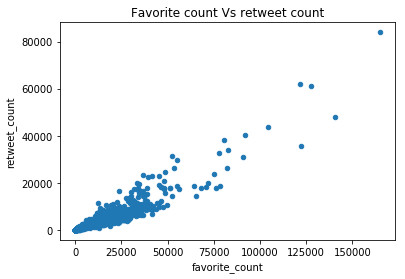

In [864]:
twitter_full_enhanced_df.plot.scatter(x= 'favorite_count', y = 'retweet_count')
plt.title('Favorite count Vs retweet count')

In [865]:
twitter_full_enhanced_df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2106.000000,2106.000000
mean,2747.170465,8871.168566
std,4776.943074,12812.355475
min,12.000000,80.000000
25%,605.000000,1974.000000
50%,1330.500000,4049.000000
75%,3118.750000,11030.750000
max,83889.000000,164638.000000


In [866]:
twitter_full_enhanced_df['retweet_count'].corr(twitter_full_enhanced_df['favorite_count'])

0.9279362842850587

- In order to see if the two attributes are correlated i used the scatter plot which shows that the higher retweet_count corresponds to a high favorite counts.
- The second way to confirm this is to use the correlation function which shows a correlation of 0.9275 this is strong correlation between the two variables

### 2) Most popular dog names

count the number of each dog name and specify the most common and the least common dog names

In [867]:
names_df = twitter_full_enhanced_df.groupby('name')['name'].agg({'count': np.size}).reset_index()
names_df.head()

/home/nisrein/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,name,count
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1


In [868]:
# top ten dog names found by sorting based on the name apperance count
names_df.sort_values(by = ['count'],ascending= False).head(10)

,name,count
559,Lucy,11
172,Charlie,11
213,Cooper,10
652,Oliver,10
906,Tucker,9
677,Penny,9
547,Lola,8
768,Sadie,8
938,Winston,8
890,Toby,7


In [869]:
names_df['count'].value_counts()

1     720
2     135
3     44 
4     27 
5     11 
6     7  
8     3  
11    2  
10    2  
9     2  
7     2  
Name: count, dtype: int64

The above show that most of the names are unique since the most common count or frequncy or the dog name is 1 and the most repeated name occured 11 times 

### 3) Dog Stages Count 
percentage of different dog stages in the dataset.
i removed the data that did not have dog stage from the dataframe.

In [870]:
twitter_full_enhanced_df['dog_stages'].value_counts(normalize=True) * 100

pupper    65.535248
doggo     23.498695
puppo     6.266319 
floof     4.699739 
Name: dog_stages, dtype: float64

In [871]:
#removing None type from dog stage
twitter_full_enhanced_df['dog_stages'].value_counts(normalize=True) * 100

pupper    65.535248
doggo     23.498695
puppo     6.266319 
floof     4.699739 
Name: dog_stages, dtype: float64

the most prevailing dog stage is the pupper and the least present in the data is the floof

Text(0,0.5,'Count')

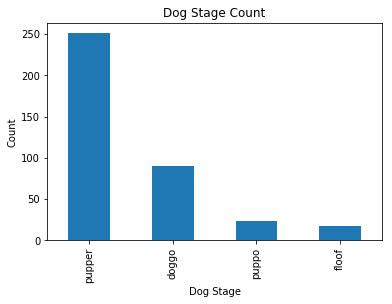

In [872]:
twitter_full_enhanced_df['dog_stages'].value_counts().plot(kind='bar')
plt.title('Dog Stage Count')
plt.xlabel('Dog Stage')
plt.ylabel('Count')

### 4) Dog stages vs favorite count
group the data by the dog stage and get the average favorite count for each group.

In [873]:
dog_stage__favorite_df = twitter_full_enhanced_df.groupby('dog_stages')['favorite_count'].agg({'avg_favorites_count': np.mean}).reset_index()
dog_stage__favorite_df

/home/nisrein/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,dog_stages,avg_favorites_count
0,doggo,17634.744444
1,floof,11380.000000
2,pupper,6945.956175
3,puppo,22844.500000


Text(0.5,1,'average favorite count per dog stage')

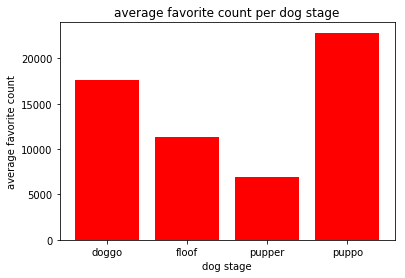

In [874]:
plt.bar(dog_stage__favorite_df['dog_stages'], dog_stage__favorite_df['avg_favorites_count'], color = 'red')
plt.xlabel('dog stage')
plt.ylabel('average favorite count')
plt.title('average favorite count per dog stage')

from the above plot and the information above on the differnt dog stage and favorite count we can see that the puppo has the highest average favorites count though it was the 2nd least present in our data as mentioned in the previous section and the pupper which was the most present in our data was had the 2nd least number of favorites count.